#### Linear Regression With Pytorch

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.2+cu121'

#### Data Creation

In [2]:
torch.manual_seed(42)
weigth = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02
X = torch.arange(start,end, step).unsqueeze(dim = 1)
Y = weigth * X + bias 

X[:10], Y[:10],  len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

#### Test and Train 

In [3]:
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

print(" X_train", len(X_train),"\n","Y_train" , len(Y_train))
print(" X_test", len(X_test),"\n","Y_test", len(Y_test))

 X_train 40 
 Y_train 40
 X_test 10 
 Y_test 10


In [4]:
X_train, Y_train 

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
    
    plt.legend(prop={'size': 14})
    plt.show()


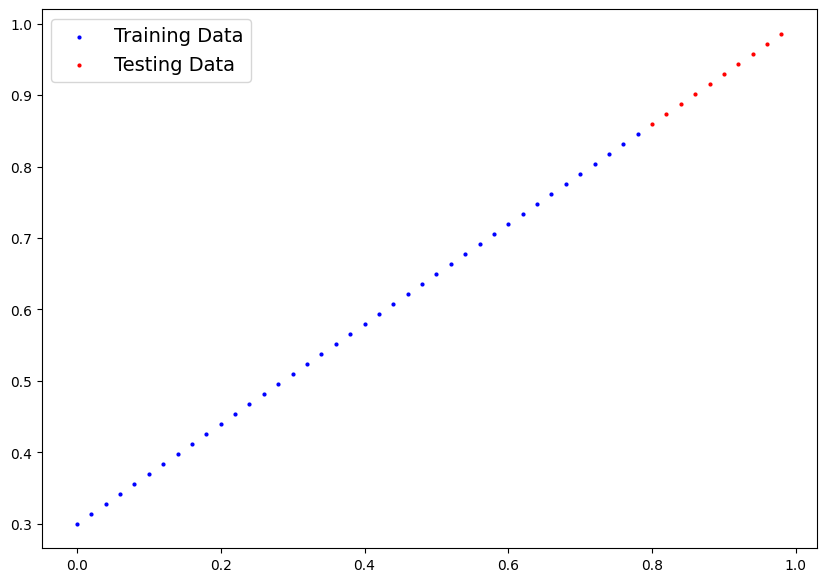

In [6]:
plot_predictions();

#### Build Model

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [8]:
lr_model = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)

In [9]:
list(lr_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
epochs = 200
torch.manual_seed(42)
epoch_count = []
loss_values = []
test_loss_values = []

# Ciclo di addestramento
for epoch in range(epochs):
    
    lr_model.train()
    ### Forward
    y_pred = lr_model(X_train)
    ### Loss
    loss = loss_fn(y_pred, Y_train)
    
    ### optimizer
    optimizer.zero_grad()
    ### backpropagation
    loss.backward()
    ### Aggiorna i pesi (discesa del gradiente)
    optimizer.step()

    # Imposta il modello in modalità di valutazione
    lr_model.eval()
    
    with torch.inference_mode():
        test_prod = lr_model(X_test)
        test_loss = loss_fn(test_prod, Y_test)
        
    if epoch % 10 == 0:  
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss_values.append(test_loss)
        print(f"Epoch {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}")

Epoch 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Epoch 140 | Loss

In [11]:
lr_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [12]:
with torch.inference_mode():
    Y_pred = lr_model(X_test)

In [13]:
print(Y_pred)

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


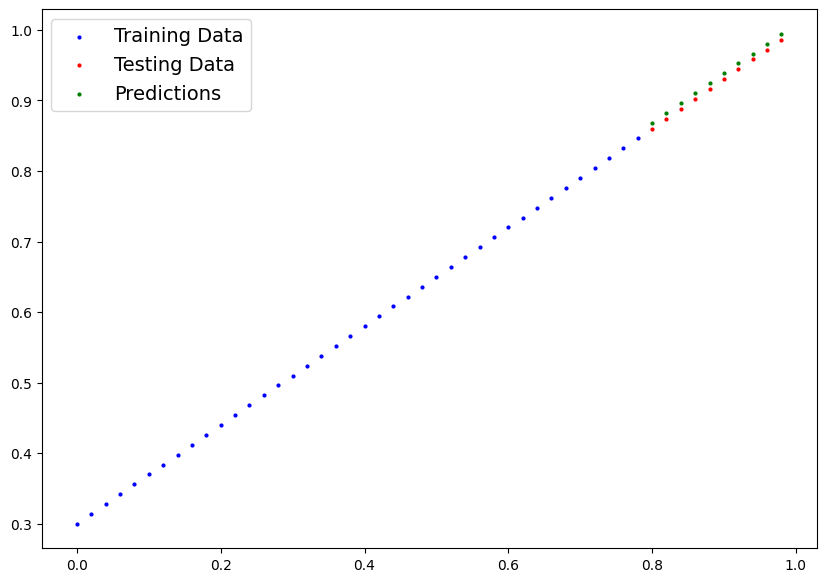

In [14]:
plot_predictions(predictions=Y_pred)

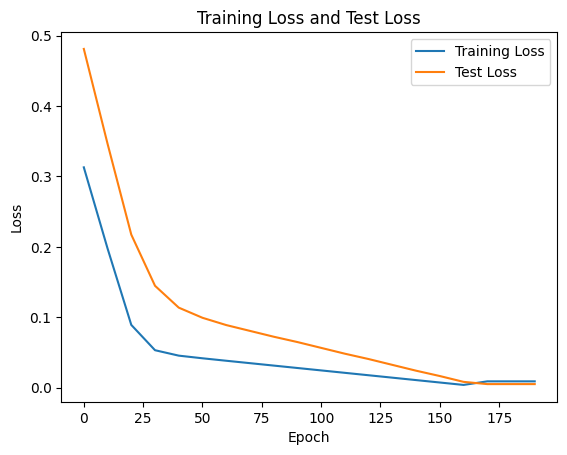

In [15]:
plt.plot(epoch_count,loss_values, label="Training Loss")
plt.plot(epoch_count,test_loss_values, label="Test Loss")
plt.title("Training Loss and Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Save Model 

In [16]:
from pathlib import Path

Model_Path = Path("models")
Model_Path.mkdir(parents = True, exist_ok=True)

Model_Name = "LinearRegressionModel.pth"
model_save_path = Model_Path / Model_Name
torch.save(obj= lr_model.state_dict(),f = model_save_path)

### Model 2 Build 

In [17]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [18]:
torch.manual_seed(42)
lr_model_v2 = LinearRegressionV2()
lr_model_v2.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [19]:
X_train[:5], Y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [20]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = lr_model_v2.parameters(), lr=0.01)

In [21]:
torch.manual_seed(42)
epoch_count_V2 = []
loss_values_V2 = []
test_loss_values_V2 = []

EPOCHS = 200
for epoch in range(EPOCHS):
    lr_model_v2.train()
    y_pred = lr_model_v2(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    lr_model_v2.eval()
    with torch.no_grad():
        test_prod = lr_model_v2(X_test)
        test_loss = loss_fn(test_prod, Y_test)
        
    if epoch % 10 == 0: 
        epoch_count_V2.append(epoch)
        loss_values_V2.append(loss.item())
        test_loss_values_V2.append(test_loss)
        print(f"Epoch {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}")

Epoch 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 140

In [22]:
with torch.inference_mode():
    Y_pred_2 = lr_model_v2(X_test)

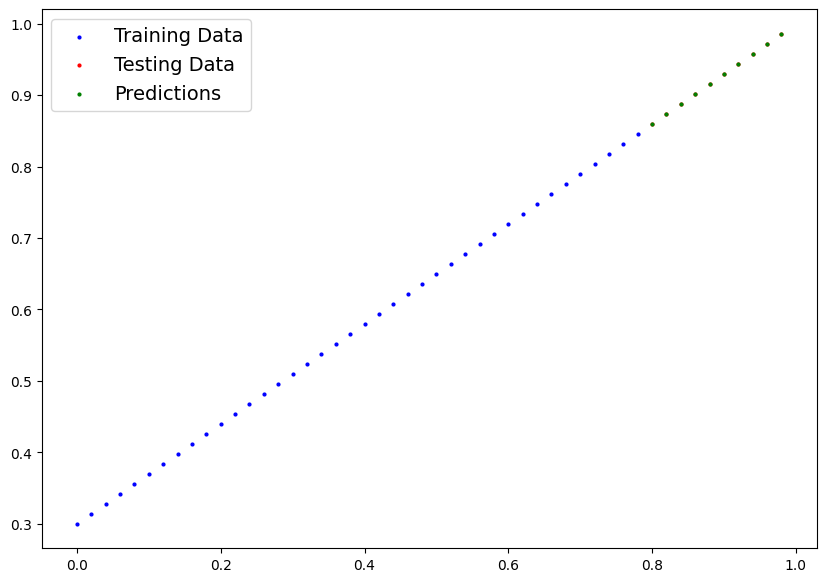

In [23]:
plot_predictions(predictions=Y_pred_2)

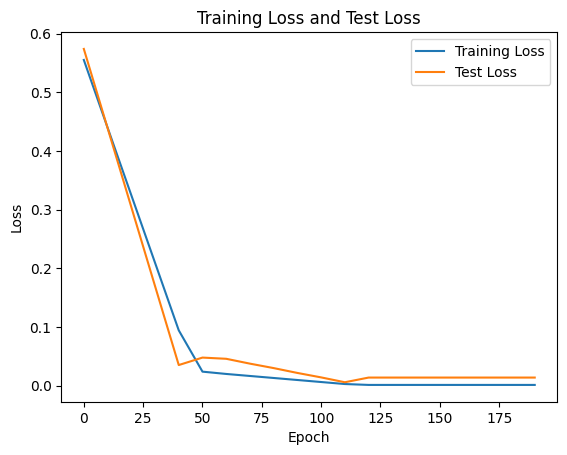

In [24]:
plt.plot(epoch_count_V2,loss_values_V2, label="Training Loss")
plt.plot(epoch_count_V2,test_loss_values_V2, label="Test Loss")
plt.title("Training Loss and Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()